In [36]:
import pandas as pd 
import numpy as np 
import pickle 
from sklearn.metrics import accuracy_score 
from pdpbox import pdp, info_plots 
from matplotlib import pyplot as plt 

In [31]:
## Load the sigmoid model 
sigmoid = pickle.load(open('sigmoid_model.sav', 'rb')) 

## Load in the data 
## Read in csv 
df = pd.read_csv('model_data.csv', 
                                index_col = ['year', 'ID']).dropna()

## Test and train split for time series
train = df.head(
    int(df.shape[0] * 0.8 ) 
) 

test = df.tail(
    int(df.shape[0] * 0.2) 
)

## Split into x and y 
def SplitData(df): 
    y = df.lead_rating 
    x = df.drop('lead_rating', axis = 1) 
    
    return x, y 

train_x, train_y = SplitData(train) 
test_x, test_y = SplitData(test) 

## Look at the initial model accuracy 
print(
    accuracy_score(sigmoid.predict(test_x), test_y) 
)
print(df.shape) 
cols = df.columns.tolist()
print(cols) 
cols[1]

0.6906077348066298
(1813, 13)
['lead_rating', 'rating', 'IQ_TOTAL_ASSETS', 'IQ_TOTAL_REV', 'IQ_NI_CF', 'IQ_AR', 'IQ_GP ', 'IQ_AP', 'IQ_TOTAL_LIAB', 'IQ_TOTAL_DEBT', 'IQ_CASH_FINAN', 'IQ_TOTAL_EQUITY', 'IQ_CASH_EQUIV']


'rating'

We can see there are 13 columns 

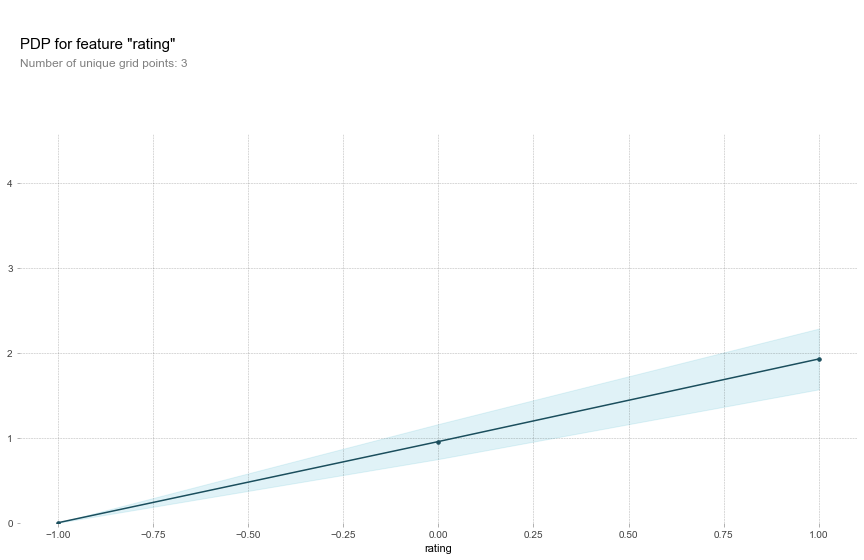

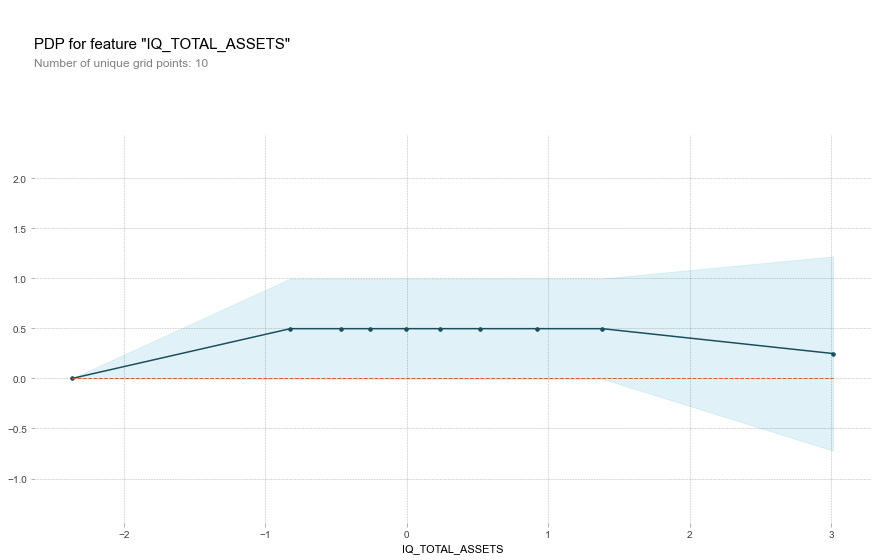

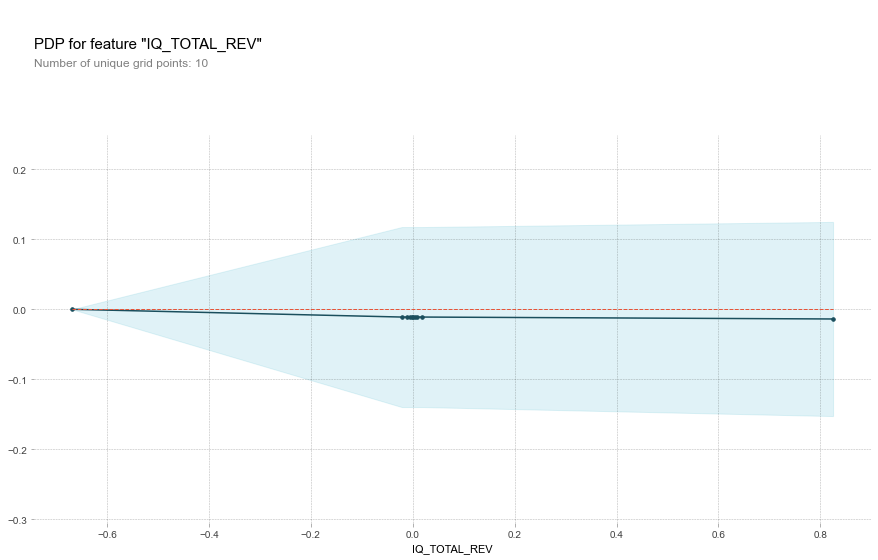

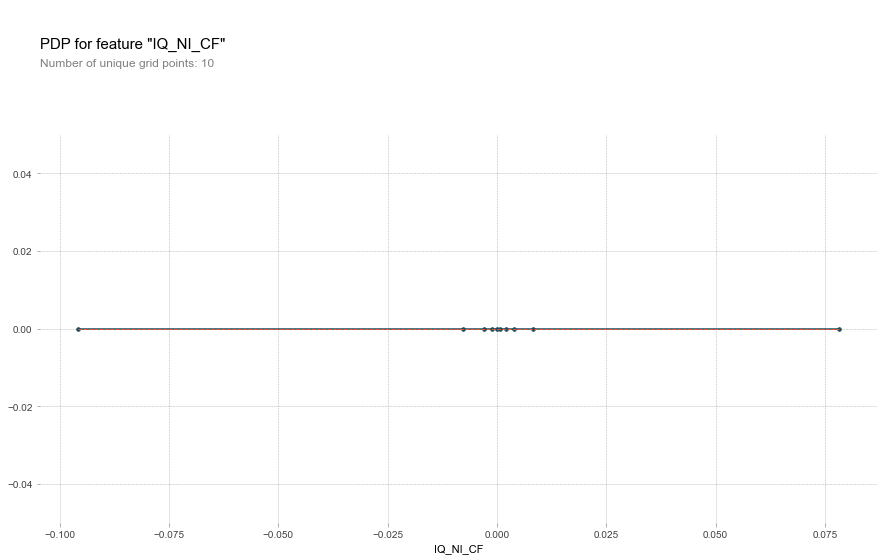

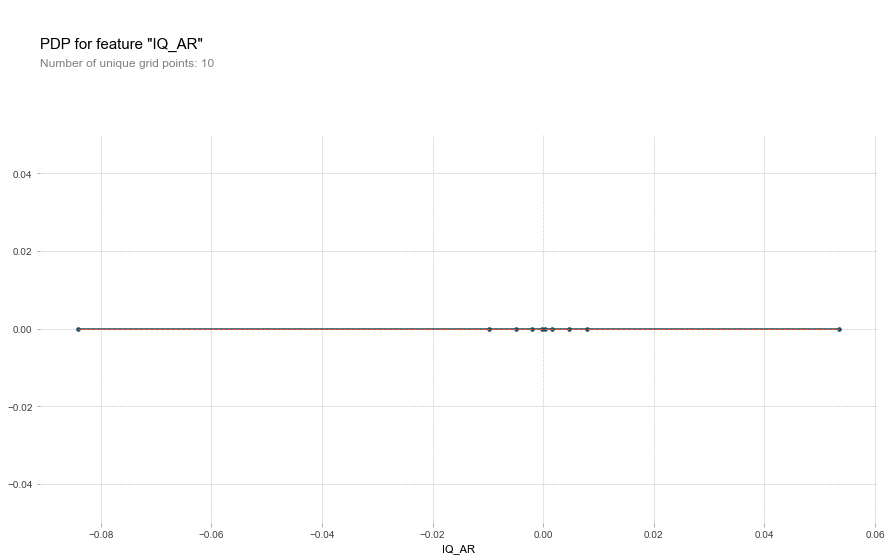

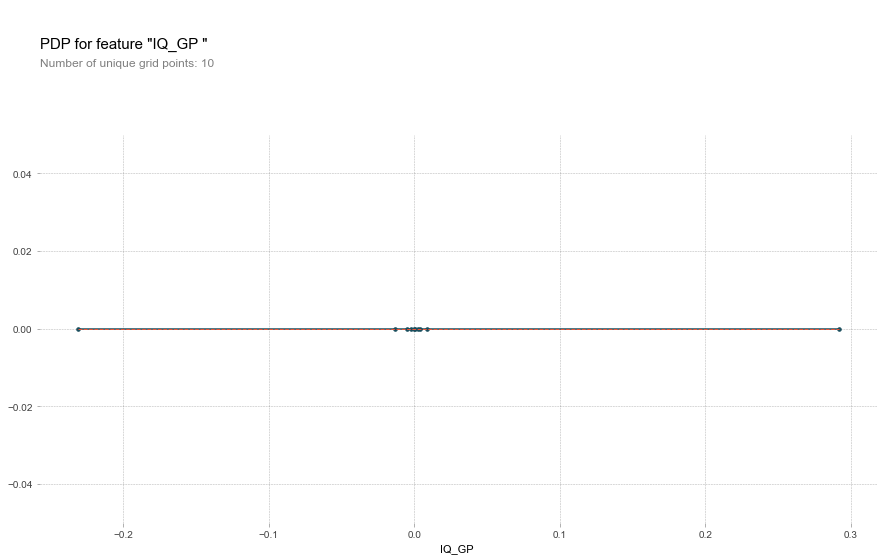

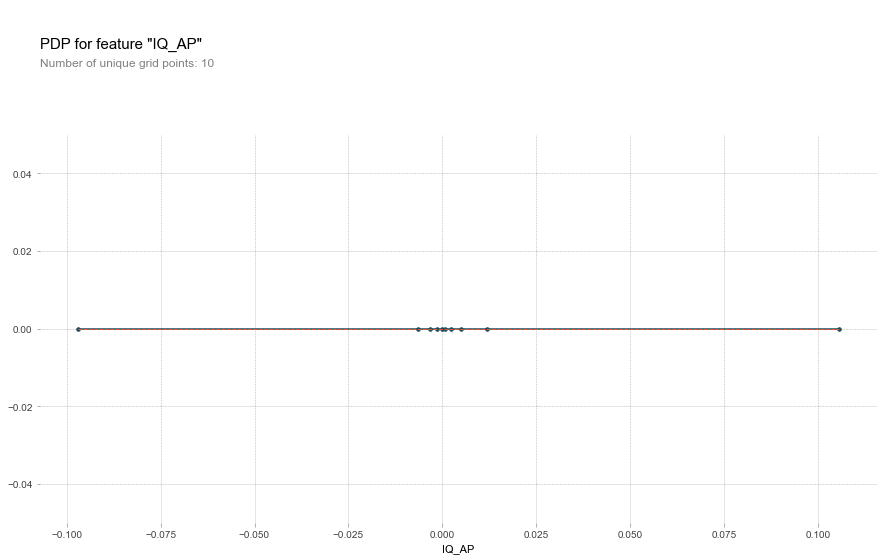

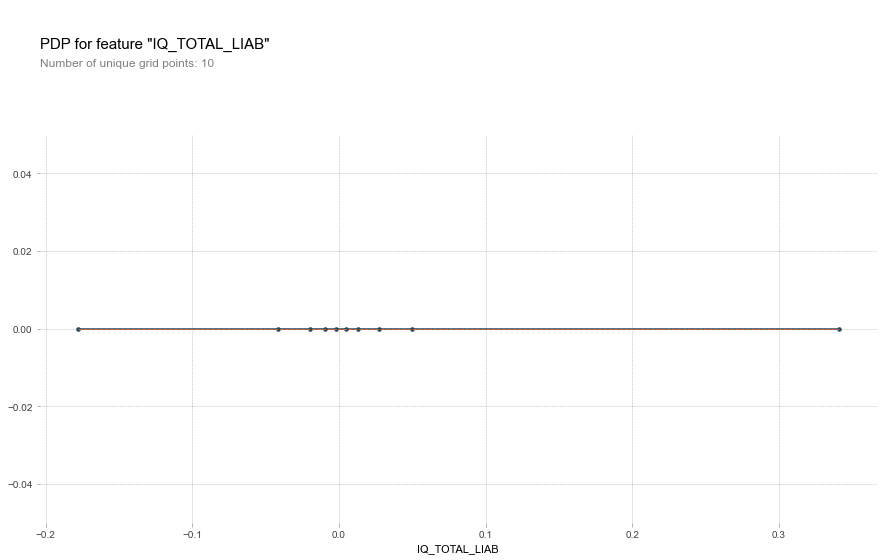

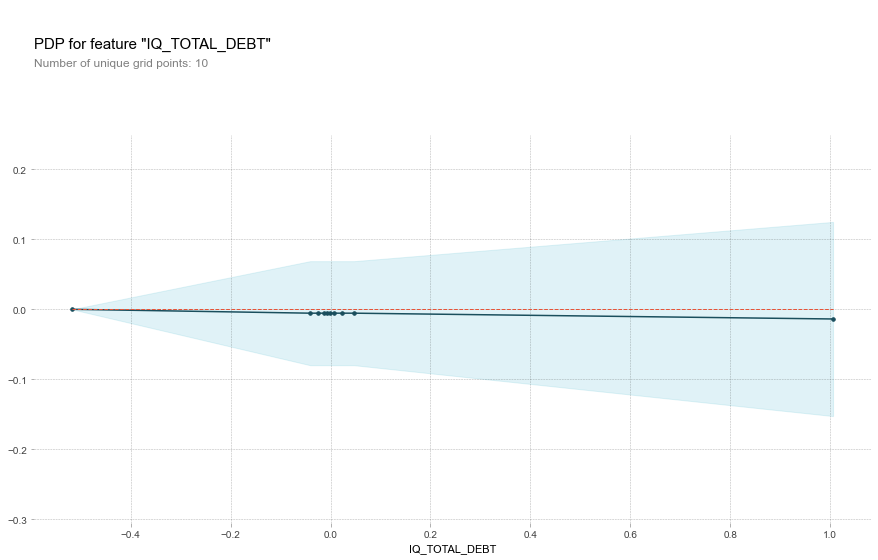

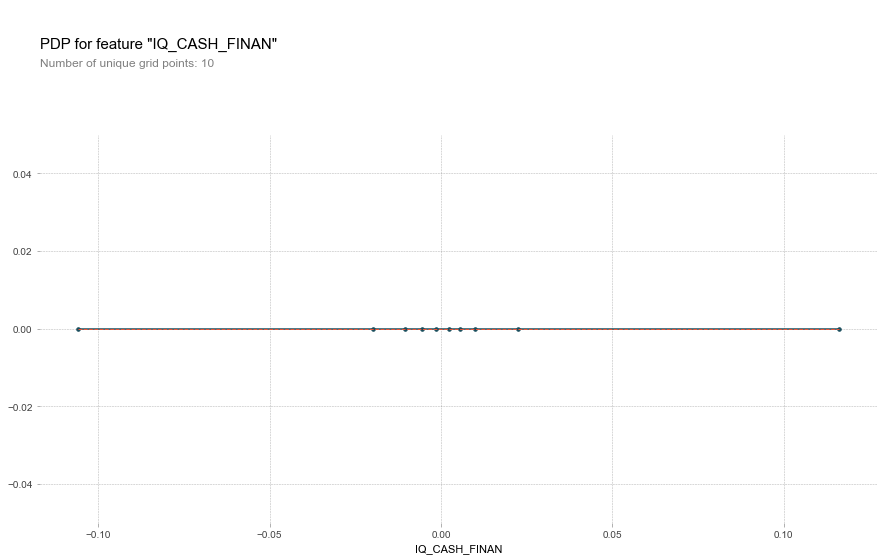

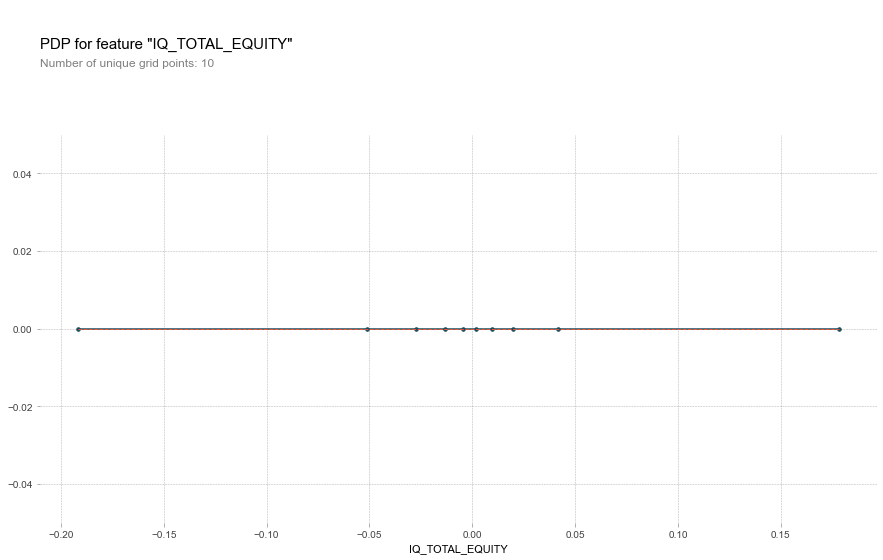

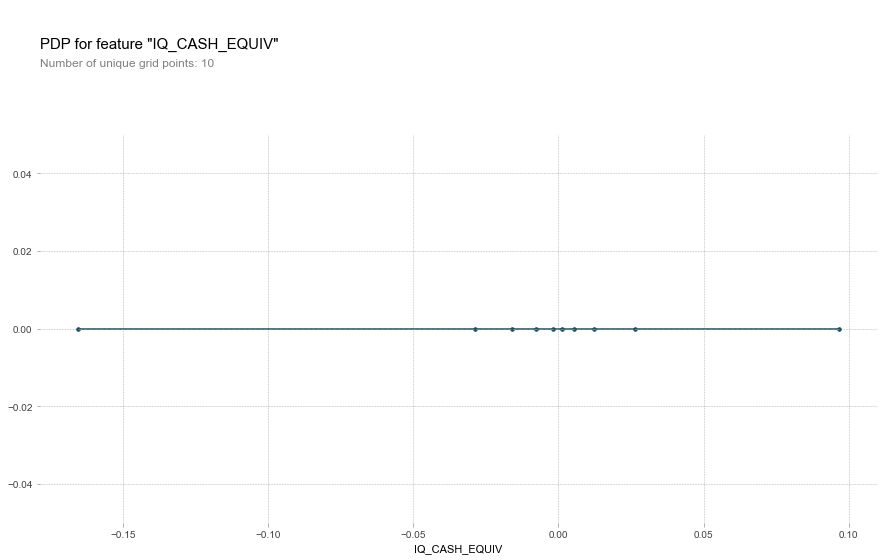

In [39]:
## PDP Plots 
def PDP_Plot_Graphs(test_x, cols): 
    '''Create PDP Plots'''
    
    pdp_plot = [] 
    for i in cols[1:]: 
        '''Create Graph for pdp plots'''
        
        pdp_rating = pdp.pdp_isolate(model = sigmoid, 
                            dataset = test_x, 
                            model_features = cols[1:], 
                            feature = i) 
        
        pdp_plot.append(
        pdp.pdp_plot(pdp_rating, i) 
        )
    return pdp_plot 

#pdp_plots = PDP_Plot_Graphs(test_x, cols) 

In [26]:
fi, ax = pdp.pdp_plot()

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='rating'>})